### 4. Machine Learning:

#### Loading the dataset test_restaurant.csv:

In [56]:
test_rest = pd.read_csv("test_restaurant.csv")

In [57]:
print(test_rest)

            date  num_visitors
0     2000-01-01     49.128490
1     2000-01-02     50.288060
2     2000-01-03     53.549213
3     2000-01-04     45.453240
4     2000-01-05     49.469402
5     2000-01-06     48.554940
6     2000-01-07     47.056410
7     2000-01-08     44.184040
8     2000-01-09     45.621517
9     2000-01-10     53.566944
10    2000-01-11     43.316624
11    2000-01-12     42.019733
12    2000-01-13     38.802547
13    2000-01-14     43.624550
14    2000-01-15     38.388020
15    2000-01-16     38.329530
16    2000-01-17     33.622574
17    2000-01-18     32.610300
18    2000-01-19     31.947649
19    2000-01-20     32.078766
20    2000-01-21     33.063114
21    2000-01-22     31.547438
22    2000-01-23     32.104580
23    2000-01-24     26.621574
24    2000-01-25     28.619835
25    2000-01-26     24.416117
26    2000-01-27     20.280500
27    2000-01-28     18.039778
28    2000-01-29     11.110561
29    2000-01-30      9.938544
...          ...           ...
3621  20

#### Checking the null values:

In [58]:
test_rest.isnull().sum()

date            0
num_visitors    0
dtype: int64

#### Creating date as the index, which will be used for time series analysis:

In [59]:
test_rest = test_rest.set_index('date')
test_rest.index = pd.to_datetime(test_rest.index)

#### As we have the data for all the days, from 2000 to 2009, I resampled the data to store the average daily sales for a particular month:

In [61]:
visitors_ts = test_rest['num_visitors'].resample('MS').mean()
print(visitors_ts)

date
2000-01-01    35.595298
2000-02-01    28.589916
2000-03-01    23.206763
2000-04-01    15.670963
2000-05-01    14.346570
2000-06-01    11.983469
2000-07-01    11.303108
2000-08-01    10.097968
2000-09-01    10.697717
2000-10-01    11.475539
2000-11-01    11.853336
2000-12-01    12.995834
2001-01-01    36.006979
2001-02-01    30.746140
2001-03-01    24.933771
2001-04-01    19.200388
2001-05-01    15.694732
2001-06-01    13.640991
2001-07-01    14.589511
2001-08-01    13.264524
2001-09-01    13.021404
2001-10-01    13.105394
2001-11-01    13.282902
2001-12-01    15.768819
2002-01-01    38.581048
2002-02-01    33.298417
2002-03-01    27.821976
2002-04-01    20.128589
2002-05-01    16.564275
2002-06-01    15.441599
                ...    
2007-07-01    24.444731
2007-08-01    23.826821
2007-09-01    23.917627
2007-10-01    23.585372
2007-11-01    23.908086
2007-12-01    26.379341
2008-01-01    47.217441
2008-02-01    44.804185
2008-03-01    37.076487
2008-04-01    31.629423
2008-05-01 

#### Visualizing the 'visitors' time series data: 

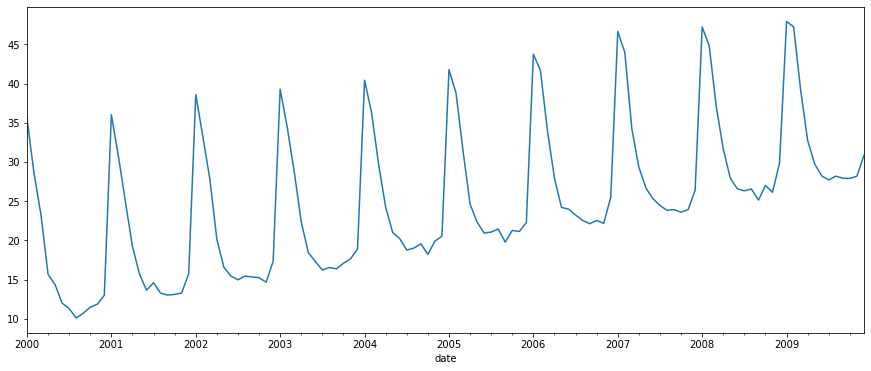

In [62]:
visitors_ts.plot(figsize=(15, 6))
plt.show()

#### Here, we can observe a seasonal trend for every year as the number visitors are maximum in the month of January and then decreases steeply. 

#### Now, as we know that the time series data is seasonal, I decomposed the time series data into three different components - Trend, Seasonal and Noise:

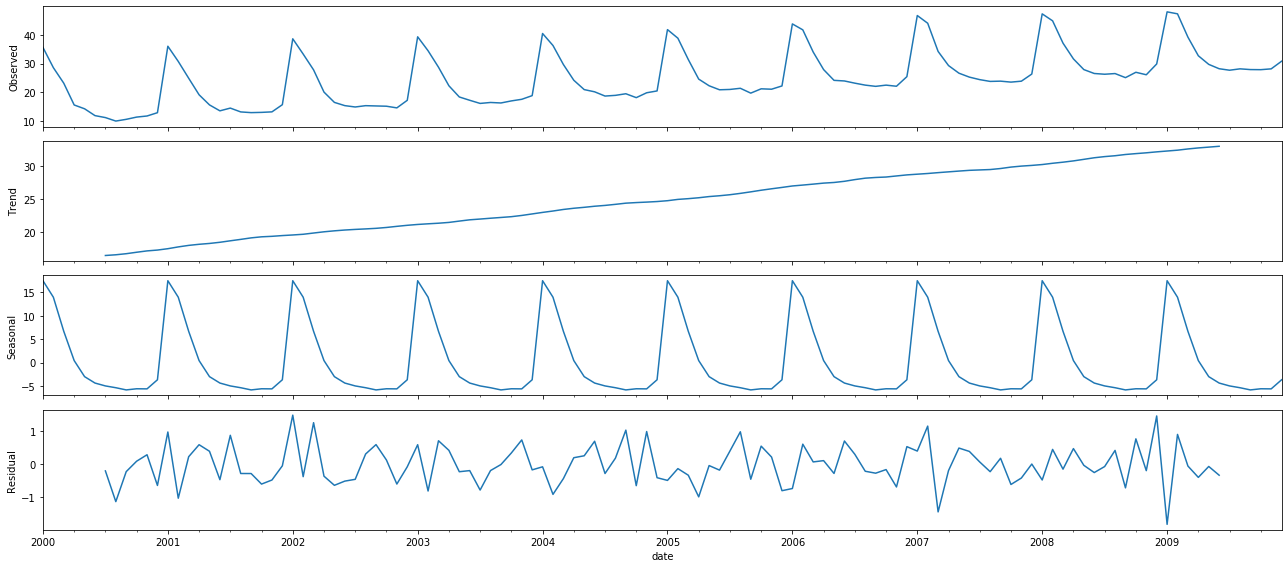

In [63]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(visitors_ts, model='additive')
fig = decomposition.plot()
plt.show()

#### Now, I will use the ARIMA model to find the parameters p,d and q that account for seasonality, trend and noise.:

In [64]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


#### To fit the best ARIMA model, we need to find the parameters for which the corresponding AIC values are the minimum:

In [65]:
aic_values = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(visitors_ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False, 
                                            enforce_invertibility=False)
            results = mod.fit()
            aic_values.append([results.aic,param,param_seasonal])
        except:
                continue 

C:\Users\Ayush\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Ayush\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Ayush\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Ayush\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Ayush\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmode

#### Selecting the best parameters with minimum AIC values:

In [66]:
min_index = np.argmin(aic_values,axis=0)

In [67]:
min_aic_values = aic_values[min_index[0]]
print(min_aic_values)

[209.65479095638415, (0, 1, 1), (0, 1, 1, 12)]


#### Fitting the ARIMA model now:

In [68]:
mod = sm.tsa.statespace.SARIMAX(visitors_ts,
                                order=min_aic_values[1],
                                seasonal_order=min_aic_values[2],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000    277.714     -0.004      0.997    -545.309     543.309
ma.S.L12      -0.5887      0.118     -5.005      0.000      -0.819      -0.358
sigma2         0.4963    137.817      0.004      0.997    -269.620     270.612


#### Executing the model's diagnostics and validating the results:

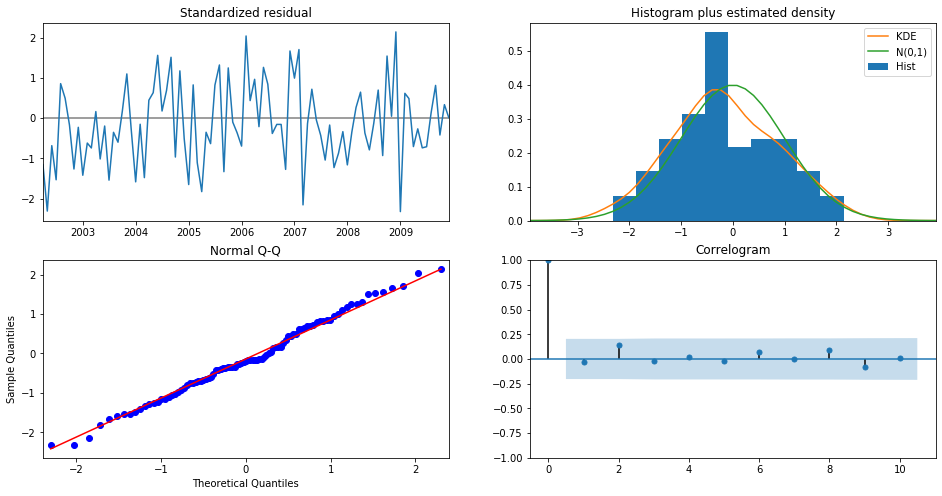

In [29]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

#### It can be observed that the residuals are normally distributed

#### Forecasting the number of visitors for the next day:

In [73]:
results.forecast()

2010-01-01    50.701499
Freq: MS, dtype: float64

### Hence, the approximate number of visitors on the next day is 51